# Scatter plots

In [1]:
import os
from dotenv import load_dotenv, find_dotenv

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl



/var/folders/fw/40ykb3nj66dcx6d6rr1n66pr0000gr/T/ipykernel_60805/1121247027.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# makes the inline-figures in notebooks look crisper
%config InlineBackend.figure_format = 'svg'

In [3]:
load_dotenv(find_dotenv(usecwd=True));
data_folder=os.getenv('DATA_FOLDER')

In [4]:
figsize_rect = (9, 5)
figsize_square = (8, 8)

fs_xl = 36 # titles
fs_l = 24 # subtitles
fs_m = 16 # axes and tick labels
fs_s = 14 # small stuff

In [5]:
def stamp(ax, color, alpha, label, clip_on=False, linewidth=5, fontsize=fs_m):
    ax.text(1.0, 1.0, label + "  ", color=color, alpha=alpha, fontsize=fontsize, weight='bold',
            va='top', ha='right', transform=ax.figure.transFigure, clip_on=clip_on)
    ax.add_patch(mpl.patches.ConnectionPatch(xyA=(1, 0), xyB=(1, 1), coordsA="figure fraction", 
                                         coordsB="figure fraction", axesA=ax, axesB=ax, 
                                         color=color, alpha=alpha, linewidth=linewidth,
                                         capstyle='butt', transform=ax.figure.transFigure))

def stamp_good(ax):
    stamp(ax, "olivedrab", 0.7, "good")

def stamp_phantom(ax):
    stamp(ax, "transparent", 0, "")

def stamp_bad(ax):
    stamp(ax, "#d02138", 1, "bad")

def stamp_wrong(ax):
    stamp(ax, "#8E202C", 1, "wrong")

def stamp_ugly(ax):
    stamp(ax, "#DC9515", 1, "ugly")

In [9]:
blue_jays = pd.read_csv(os.path.join(data_folder, 'dataviz_data-raw', 'blue_jays', 'blue_jays.csv'))
blue_jays

,Unnamed: 0,BirdID,KnownSex,BillDepth,BillWidth,BillLength,Head,Mass,Skull,Sex
0,1,0000-00000,M,8.26,9.21,25.92,56.58,73.30,30.66,1
1,2,1142-05901,M,8.54,8.76,24.99,56.36,75.10,31.38,1
2,3,1142-05905,M,8.39,8.78,26.07,57.32,70.25,31.25,1
3,4,1142-05907,F,7.78,9.30,23.48,53.77,65.50,30.29,0
4,5,1142-05909,M,8.71,9.84,25.47,57.32,74.90,31.85,1
...,...,...,...,...,...,...,...,...,...,...
118,119,962-62176,M,8.70,9.12,24.62,56.61,77.00,31.99,1
119,120,962-62181,M,7.96,9.80,25.07,55.68,68.00,30.61,1
120,121,962-62184,F,7.90,9.30,23.60,53.90,63.90,30.30,0
121,122,962-62185,F,7.63,8.56,24.29,54.19,70.45,29.90,0


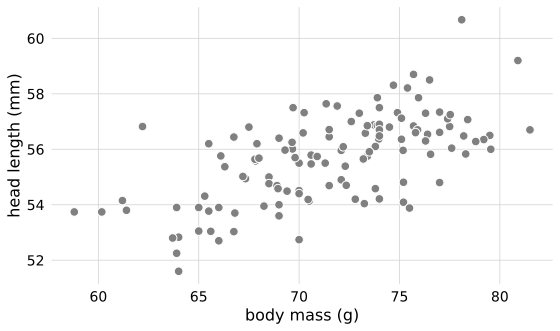

In [17]:
# Create a scatter plot
fig, ax = plt.subplots(figsize=figsize_rect)

ax.scatter(blue_jays['Mass'], blue_jays['Head'], color='gray',
           edgecolor='white', s=75)

# Set the labels for the x and y axes
ax.set_xlabel('body mass (g)', fontsize=fs_m)
ax.set_ylabel('head length (mm)', fontsize=fs_m)

# Remove the x-ticks but keep the labels
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False,
               labelsize=fs_s)

# Set the grid
ax.grid(True, color='lightgrey')
# Move gridlines to the background
ax.set_axisbelow(True)

# Remove the spines
ax.spines[:].set_visible(False)

# Show the plot
plt.show()

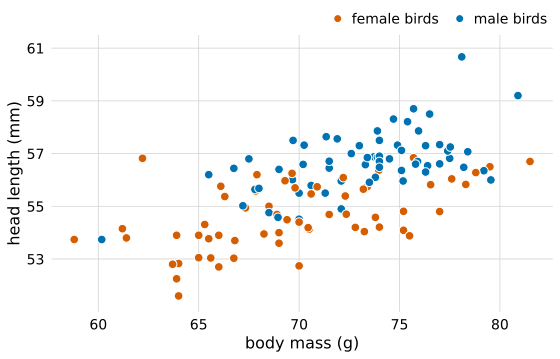

In [36]:
fig, ax = plt.subplots(figsize=figsize_rect)

# Create a scatter plot on the axes
scatter = ax.scatter(blue_jays['Mass'], blue_jays['Head'], c=blue_jays['KnownSex'].map({'F': '#D55E00', 'M': '#0072B2'}),
                     edgecolor='white', s=75)

# Set the labels for the x and y axes
ax.set_xlabel('body mass (g)', fontsize=fs_m)
ax.set_ylabel('head length (mm)', fontsize=fs_m)

# Remove the x-ticks but keep the labels
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False,
               labelsize=fs_s)

ax.set_ylim([51, 61.5])
# Set the grid
ax.set_yticks(np.arange(53, 62, 2))
ax.set_xticks(np.arange(60, 85, 5))
ax.grid(True, color='lightgrey', axis='both')
# Move gridlines to the background
ax.set_axisbelow(True)

# Remove the spines
ax.spines[:].set_visible(False)

# Create a legend
legend_labels = ['female birds', 'male birds']
legend_colors = ['#D55E00', '#0072B2']
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in legend_colors]
legend = plt.legend(markers, legend_labels, numpoints=1, loc='upper right', bbox_to_anchor=(1.0, 1.1),
                    borderaxespad=0., ncol=len(legend_labels), frameon=False, handletextpad=0.0,
                    columnspacing=0.5, fontsize=fs_s)

# Show the plot
plt.show()

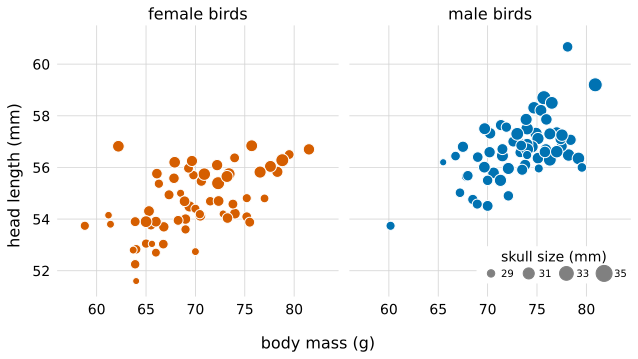

In [80]:
# Create a new column 'sex' based on 'KnownSex'
blue_jays['sex'] = np.where(blue_jays['KnownSex'] == 'F', 'female birds', 'male birds')

dot_size_max = 200
dot_size_min = 50

skull_min, skull_max = blue_jays['Skull'].min(), blue_jays['Skull'].max()
dot_size = ((blue_jays['Skull'] - skull_min) / (skull_max - skull_min)) * (dot_size_max - dot_size_min) + dot_size_min


# Create a new figure and axes
fig, axes = plt.subplots(1, 2, figsize=figsize_rect, sharey=True)

# Create a scatter plot on the axes
for ax, sex in zip(axes, ['female birds', 'male birds']):
    data = blue_jays[blue_jays['sex'] == sex]
    
    dot_size = ((data['Skull'] - skull_min) / (skull_max - skull_min)) * (dot_size_max - dot_size_min) + dot_size_min

    
    scatter = ax.scatter(data['Mass'], data['Head'], s=dot_size,
                         c=data['KnownSex'].map({'F': '#D55E00', 'M': '#0072B2'}),
                         edgecolor='white')

    ax.set_ylim([51, 61.5])
    ax.set_xlim([56, 84.5])
    # Set the grid
    ax.set_yticks(np.arange(52, 61, 2))
    ax.grid(True, color='lightgrey', axis='both')
    # Move gridlines to the background
    ax.set_axisbelow(True)

    # Remove the x-ticks but keep the labels
    ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False,
               labelsize=fs_s)

    # Remove the spines
    ax.spines[:].set_visible(False)

    # Set the title
    ax.set_title(sex, fontsize=fs_m)

fig.supxlabel('body mass (g)', fontsize=fs_m)
fig.supylabel('head length (mm)', fontsize=fs_m)

# Create a legend for the size of points
legend_labels = ['29', '31', '33', '35']
legend_sizes = [29, 31, 33, 35]

legend_sizes_norm = [(size - skull_min) / (skull_max - skull_min) * (dot_size_max - dot_size_min) + dot_size_min for size in legend_sizes]
markers = [plt.Line2D([0,0],[0,0],color='gray', marker='o', linestyle='', markersize=np.sqrt(size)) for size in legend_sizes_norm]

legend = plt.legend(markers, legend_labels, numpoints=1, title='skull size (mm)', loc='lower right', bbox_to_anchor=(1, 0.05),
           borderaxespad=0., frameon=True, handletextpad=0., columnspacing=0.5, ncol=len(legend_labels),
           fontsize=10, facecolor='white', framealpha=1.0, edgecolor='white')

# Increase the font size of the legend title
legend.get_title().set_fontsize(fs_s)

# Show the plot
plt.tight_layout()
plt.show()